In [44]:
from pandas.errors import EmptyDataError
import pandas as pd
import os 
import glob 

csv_files = glob.glob(os.path.join("results/", "*.csv")) 
  
dfs = []
for f in csv_files:       
    try:
        df = pd.read_csv(f)
        df = df[df['NameAnalyser.name'].str.contains("downsample") != True]
        df.reset_index(inplace=True)
        if len(df) > 0:
            df['layer'] = df['NameAnalyser.name'].index + 1 
            df['last'] = 'last' in f 
            dfs.append(df)
    except EmptyDataError:
        continue
        
df = pd.concat(dfs, ignore_index=True)

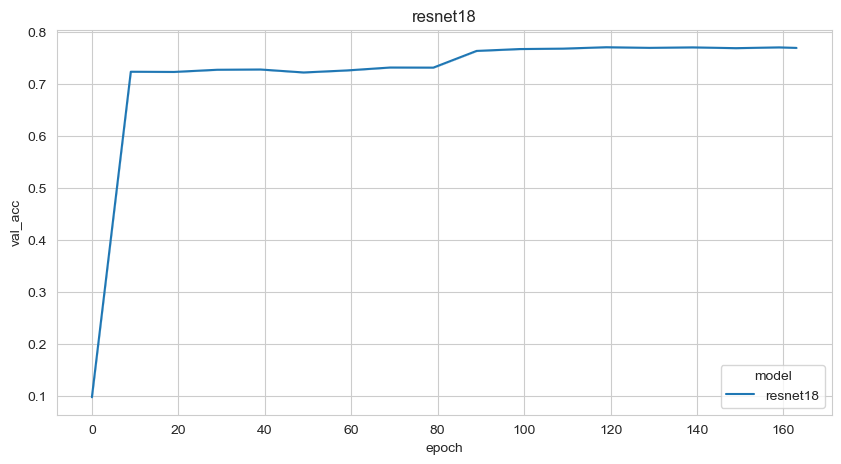

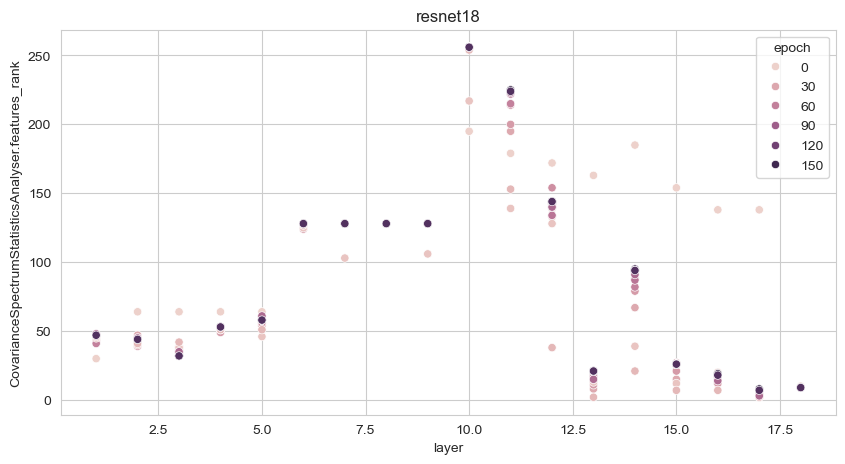

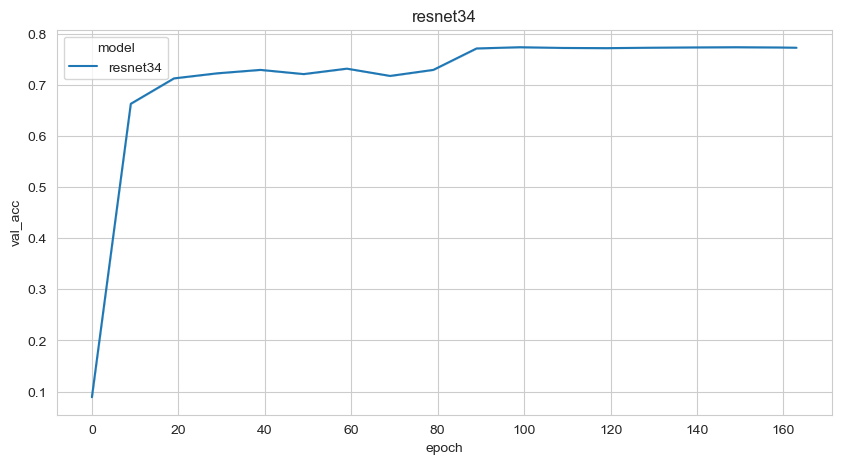

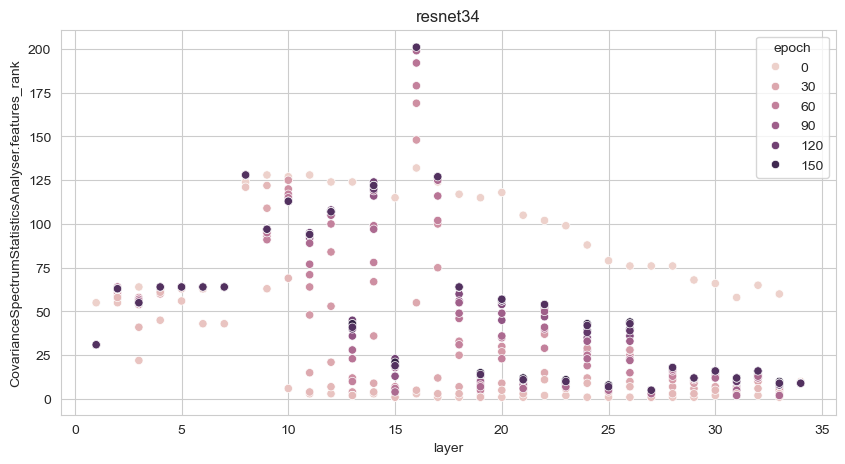

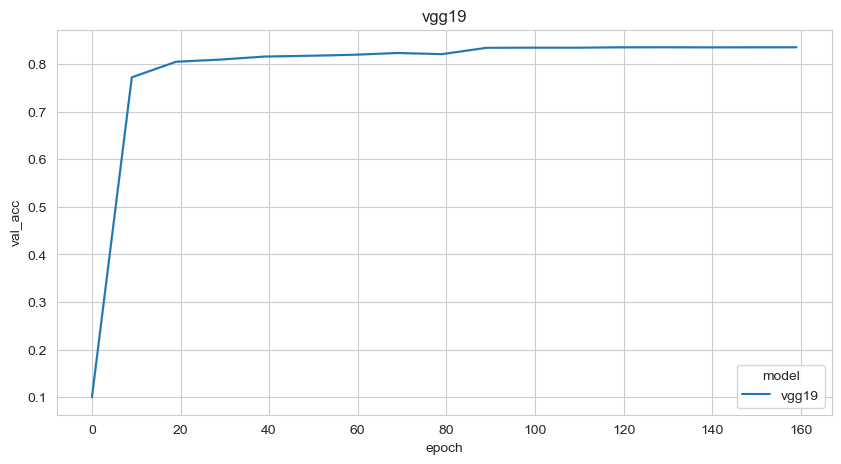

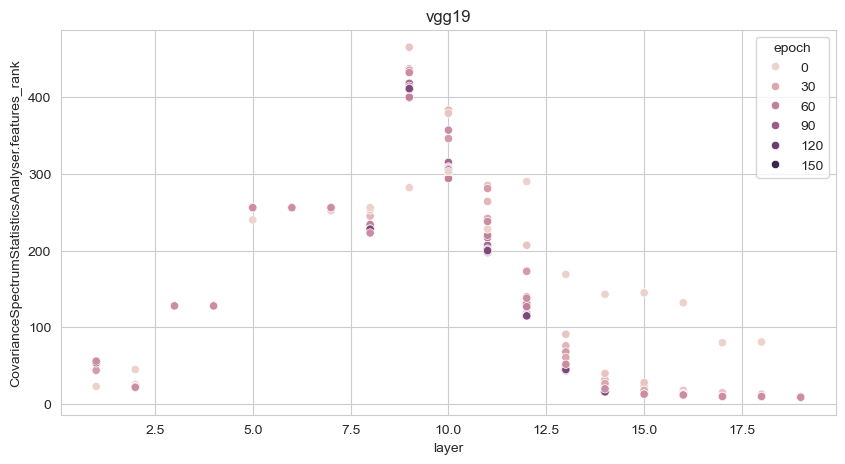

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

for model in ['resnet18', 'resnet34', 'vgg19']:
    df2 = df[(df['model']==model) & (df['dataset']=='cifar10') & (df['seed']==0)]
    plt.figure(figsize = (10,5))
    plt.title(model)
    sns.lineplot(x="epoch", y="val_acc", hue="model", data=df2)
    
    plt.figure(figsize = (10,5))
    plt.title(model)
    sns.scatterplot(x="layer", y="CovarianceSpectrumStatisticsAnalyser.features_rank", hue='epoch', data=df2)


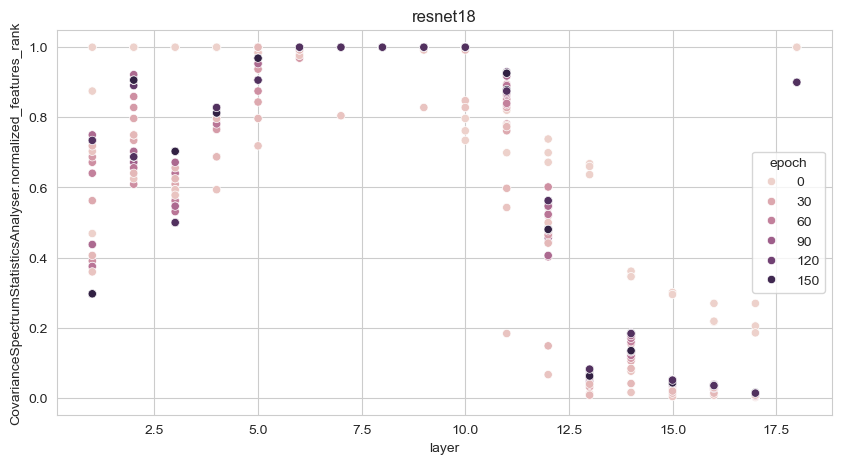

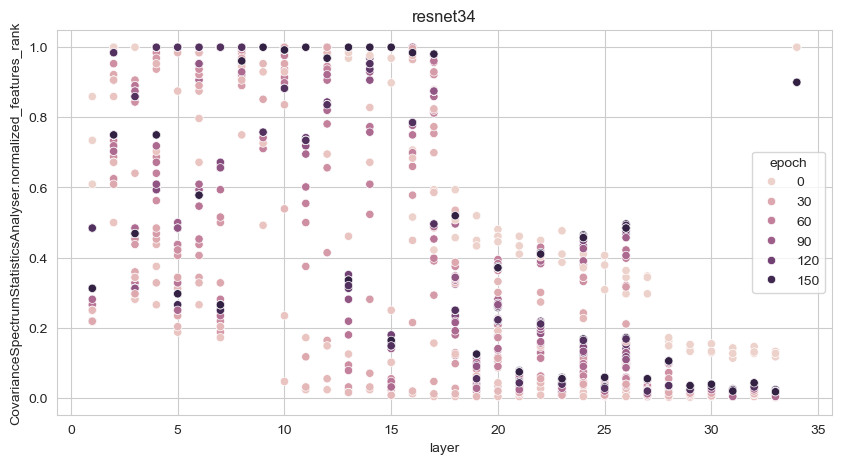

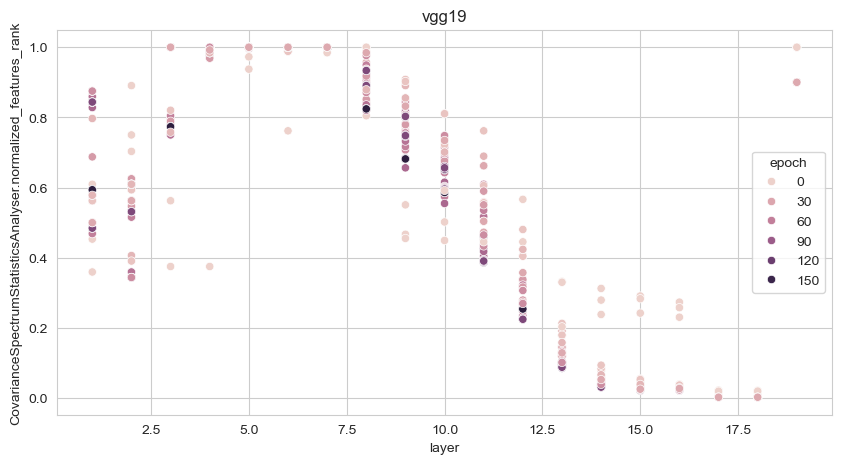

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

for model in ['resnet18', 'resnet34', 'vgg19']:
    df2 = df[(df['model']==model) & (df['dataset']=='cifar10')]
    
    plt.figure(figsize = (10,5))
    plt.title(model)
    sns.scatterplot(x="layer", y="CovarianceSpectrumStatisticsAnalyser.normalized_features_rank", hue='epoch', data=df2)


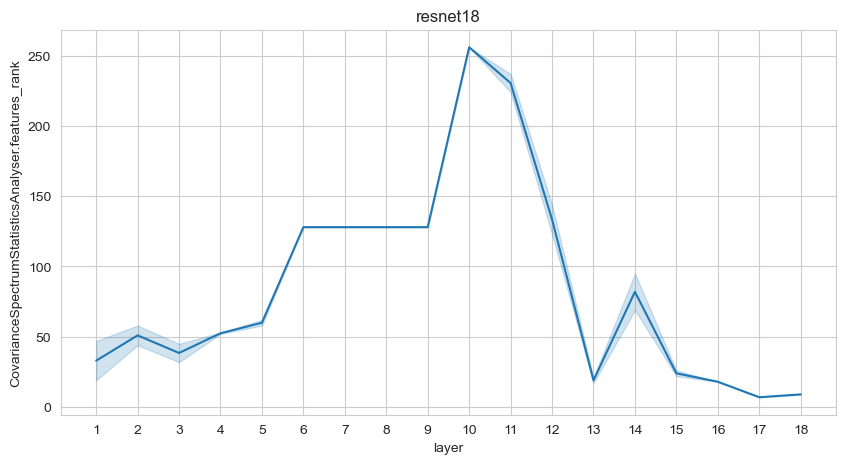

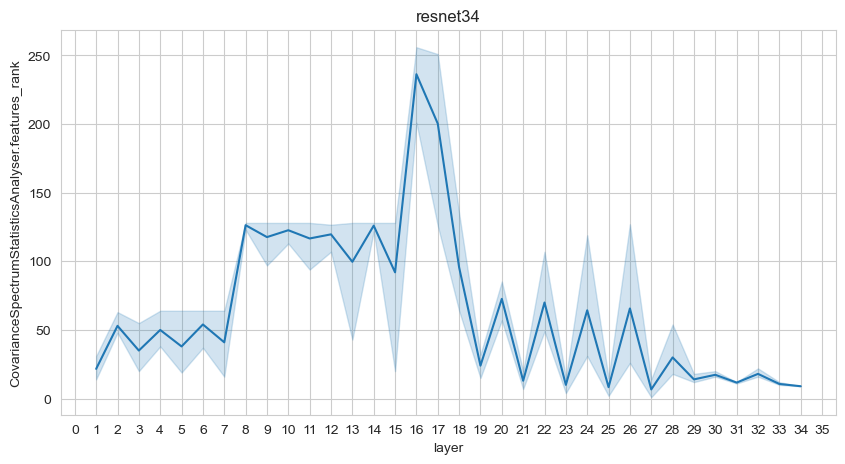

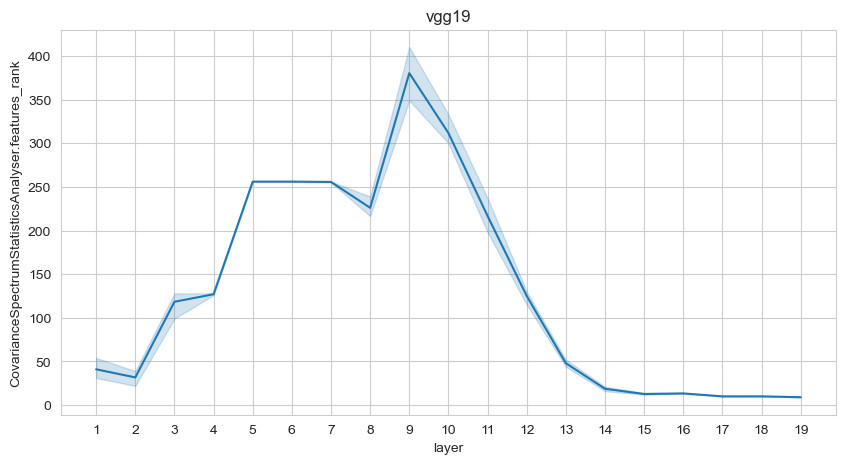

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

for model in ['resnet18', 'resnet34', 'vgg19']:
    df2 = df[(df['model']==model) & (df['dataset']=='cifar10') & df['last']]
    
    plt.figure(figsize = (10,5))
    loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
    plt.gca().xaxis.set_major_locator(loc)
    plt.title(model)
    sns.lineplot(x="layer", y="CovarianceSpectrumStatisticsAnalyser.features_rank", data=df2)


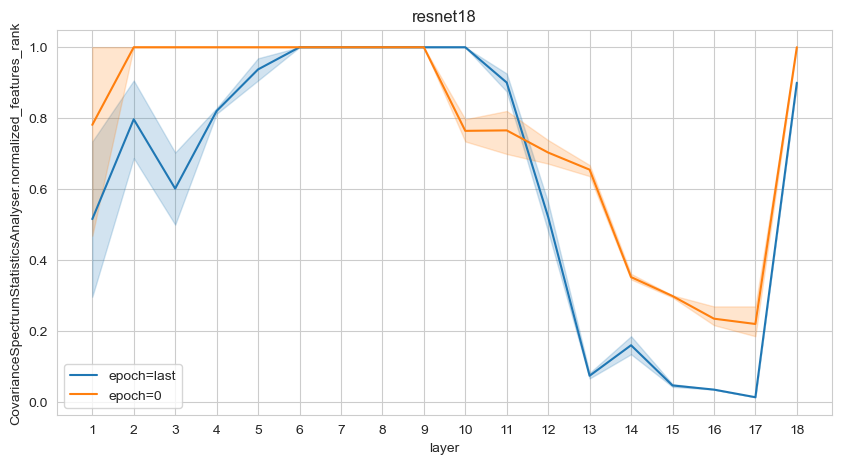

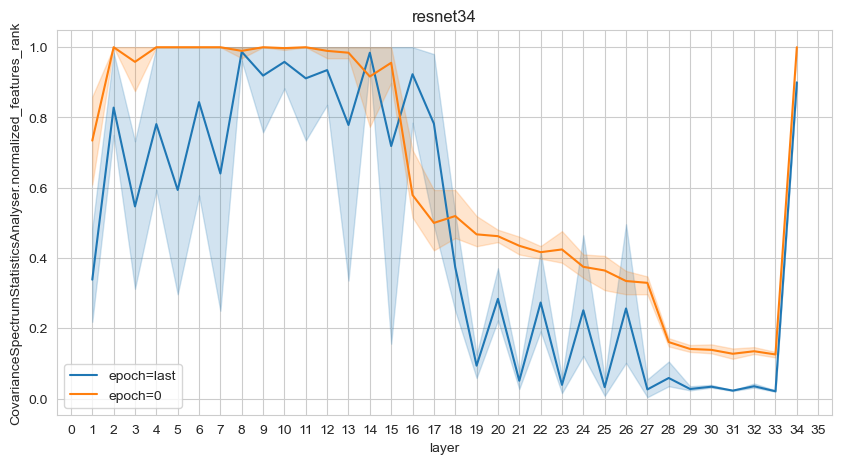

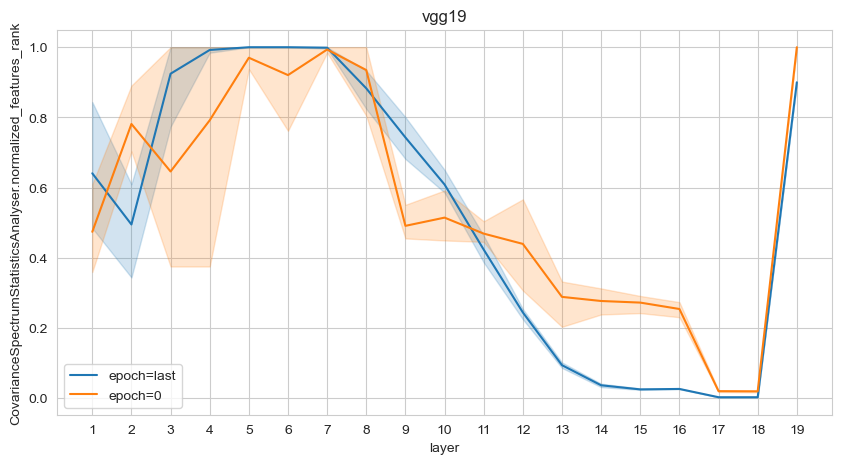

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

for model in ['resnet18', 'resnet34', 'vgg19']:
    df2 = df[(df['model']==model) & (df['dataset']=='cifar10') & df['last']]
    
    plt.figure(figsize = (10,5))
    loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
    plt.gca().xaxis.set_major_locator(loc)
    plt.title(model)
    sns.lineplot(x="layer", y="CovarianceSpectrumStatisticsAnalyser.normalized_features_rank", data=df2, label='epoch=last')
    
    df2 = df[(df['model']==model) & (df['dataset']=='cifar10') & (df['epoch']==0)]
    sns.lineplot(x="layer", y="CovarianceSpectrumStatisticsAnalyser.normalized_features_rank", data=df2, label='epoch=0')
    plt.legend()

In [49]:
df[(df['model']=='vgg19') & (df['dataset']=='cifar10') & (df['epoch']==0) & (df['NameAnalyser.name']=='features.0')]

,index,Unnamed: 0,NameAnalyser.name,CovarianceSpectrumStatisticsAnalyser.mean,CovarianceSpectrumStatisticsAnalyser.max,CovarianceSpectrumStatisticsAnalyser.features_rank,CovarianceSpectrumStatisticsAnalyser.features_rank_val,CovarianceSpectrumStatisticsAnalyser.half_rank_val,CovarianceSpectrumStatisticsAnalyser.quarter_rank_val,CovarianceSpectrumStatisticsAnalyser.normalised_spectrum_0,...,LinearProbe.train_acc,output,model,dataset,lr,seed,epoch,val_acc,layer,last
407,0,0,features.0,0.086907,4.448416,29,0.004582,0.011217,0.032141,4.448416,...,0.38576,/scratch/jsh2/tunnel/models,vgg19,cifar10,0.01,2,0,0.0994,1,False
2915,0,0,features.0,0.034136,1.162340,39,0.001177,0.013212,0.030962,1.162340,...,0.38328,/scratch/jsh2/tunnel/models,vgg19,cifar10,0.01,1,0,0.1029,1,False
3452,0,0,features.0,0.152380,7.936756,23,0.008128,0.025307,0.108921,7.936756,...,0.38766,/scratch/jsh2/tunnel/models,vgg19,cifar10,0.01,0,0,0.1000,1,False


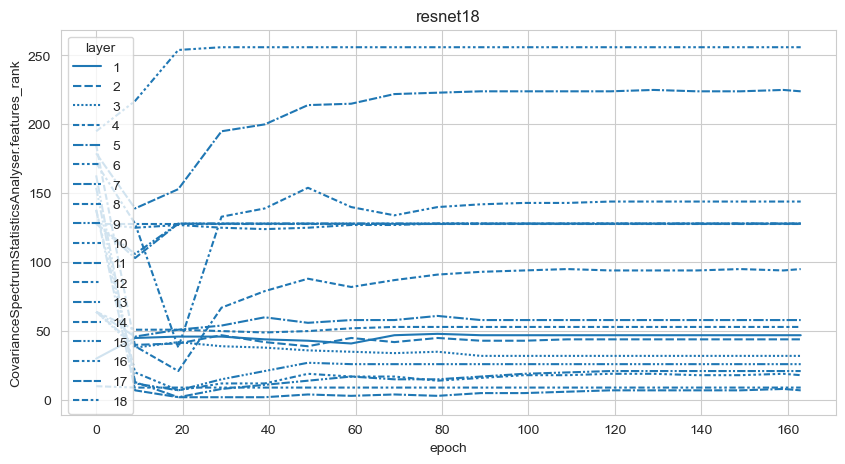

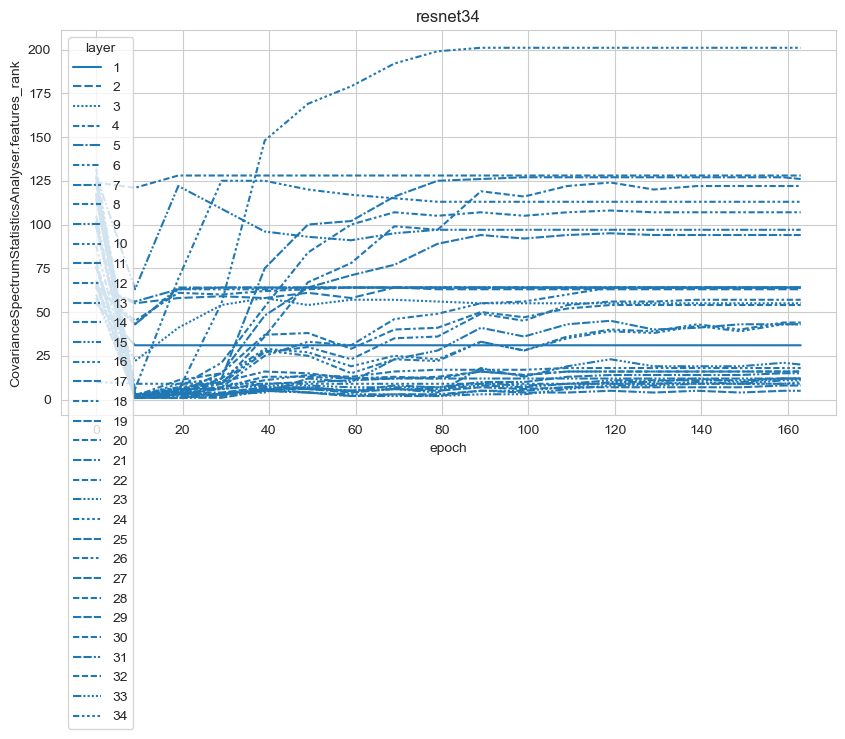

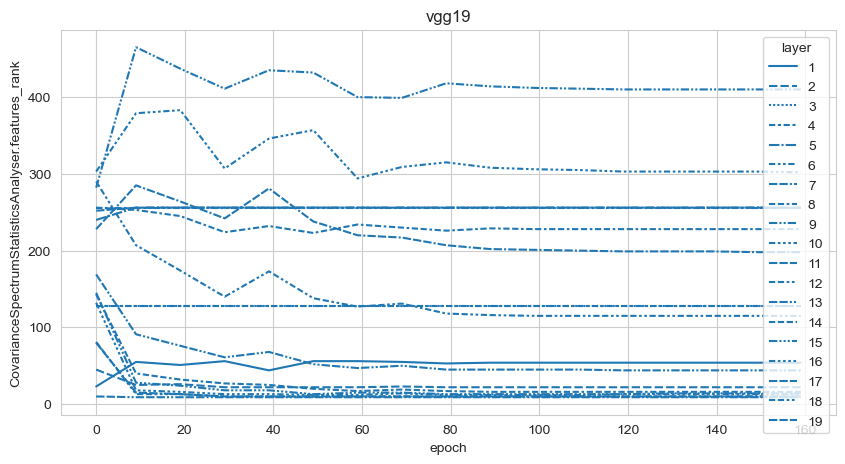

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

for model in ['resnet18', 'resnet34', 'vgg19']:
    df2 = df[(df['model']==model) & (df['dataset']=='cifar10') & (df['seed']==0)]
    
    plt.figure(figsize = (10,5))
    plt.title(model)
    sns.lineplot(x="epoch", y="CovarianceSpectrumStatisticsAnalyser.features_rank", data=df2, style='layer')

In [51]:
df

,index,Unnamed: 0,NameAnalyser.name,CovarianceSpectrumStatisticsAnalyser.mean,CovarianceSpectrumStatisticsAnalyser.max,CovarianceSpectrumStatisticsAnalyser.features_rank,CovarianceSpectrumStatisticsAnalyser.features_rank_val,CovarianceSpectrumStatisticsAnalyser.half_rank_val,CovarianceSpectrumStatisticsAnalyser.quarter_rank_val,CovarianceSpectrumStatisticsAnalyser.normalised_spectrum_0,...,LinearProbe.train_acc,output,model,dataset,lr,seed,epoch,val_acc,layer,last
0,0,0,conv1,23.362387,646.716370,47,0.733037,6.155379,20.786316,646.716370,...,0.31166,/scratch/jsh2/tunnel/models,resnet18,cifar10,0.10,0,163,0.7690,1,True
1,1,1,layer1.0.conv1,2.777923,90.246315,44,0.093369,0.678647,2.182955,90.246315,...,0.61950,/scratch/jsh2/tunnel/models,resnet18,cifar10,0.10,0,163,0.7690,2,True
2,2,2,layer1.0.conv2,0.368508,11.697462,32,0.014840,0.113955,0.415039,11.697462,...,0.67786,/scratch/jsh2/tunnel/models,resnet18,cifar10,0.10,0,163,0.7690,3,True
3,3,3,layer1.1.conv1,4.763675,74.580421,53,0.077662,1.018139,5.215999,74.580421,...,0.66022,/scratch/jsh2/tunnel/models,resnet18,cifar10,0.10,0,163,0.7690,4,True
4,4,4,layer1.1.conv2,0.244160,3.610160,58,0.004900,0.074239,0.218630,3.610160,...,0.73340,/scratch/jsh2/tunnel/models,resnet18,cifar10,0.10,0,163,0.7690,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3523,14,14,features.32,0.048545,10.301330,13,0.012931,0.462664,1.779934,10.301330,...,0.99472,/scratch/jsh2/tunnel/models,vgg19,cifar10,0.01,1,29,0.8022,15,False
3524,15,15,features.34,0.032706,8.601261,14,0.008865,0.330521,1.004936,8.601261,...,0.99442,/scratch/jsh2/tunnel/models,vgg19,cifar10,0.01,1,29,0.8022,16,False
3525,16,16,classifier.0,0.342477,608.472595,10,10.522600,85.360985,172.263168,608.472595,...,0.99420,/scratch/jsh2/tunnel/models,vgg19,cifar10,0.01,1,29,0.8022,17,False
3526,17,17,classifier.3,0.228501,381.035339,10,6.829587,53.387520,138.406555,381.035339,...,0.99400,/scratch/jsh2/tunnel/models,vgg19,cifar10,0.01,1,29,0.8022,18,False


In [52]:
df['model'].unique()

array(['resnet18', 'vgg19', 'resnet34'], dtype=object)

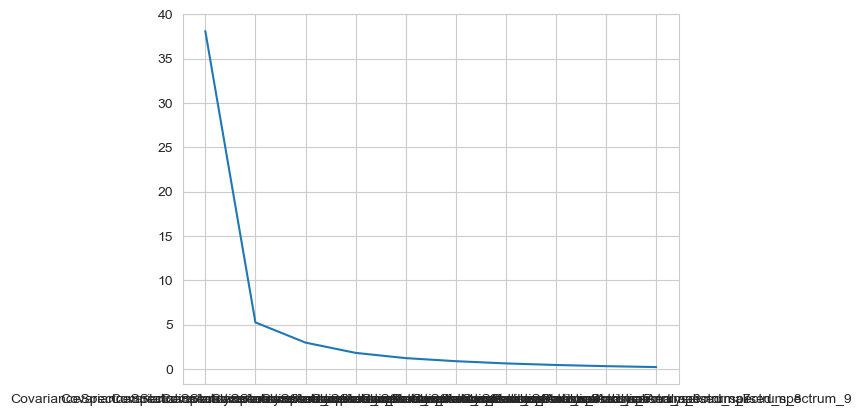

In [53]:
df2 = df[(df['model']=='vgg19') & (df['dataset']=='cifar10') & (df['seed']==0) & (df['NameAnalyser.name']=='features.10') & (df['epoch'] == 19)].T
df2 = df2[['CovarianceSpectrumStatisticsAnalyser.normalised_spectrum_' in s for s in df2.index]]
plt.plot(df2)

In [54]:
df

,index,Unnamed: 0,NameAnalyser.name,CovarianceSpectrumStatisticsAnalyser.mean,CovarianceSpectrumStatisticsAnalyser.max,CovarianceSpectrumStatisticsAnalyser.features_rank,CovarianceSpectrumStatisticsAnalyser.features_rank_val,CovarianceSpectrumStatisticsAnalyser.half_rank_val,CovarianceSpectrumStatisticsAnalyser.quarter_rank_val,CovarianceSpectrumStatisticsAnalyser.normalised_spectrum_0,...,LinearProbe.train_acc,output,model,dataset,lr,seed,epoch,val_acc,layer,last
0,0,0,conv1,23.362387,646.716370,47,0.733037,6.155379,20.786316,646.716370,...,0.31166,/scratch/jsh2/tunnel/models,resnet18,cifar10,0.10,0,163,0.7690,1,True
1,1,1,layer1.0.conv1,2.777923,90.246315,44,0.093369,0.678647,2.182955,90.246315,...,0.61950,/scratch/jsh2/tunnel/models,resnet18,cifar10,0.10,0,163,0.7690,2,True
2,2,2,layer1.0.conv2,0.368508,11.697462,32,0.014840,0.113955,0.415039,11.697462,...,0.67786,/scratch/jsh2/tunnel/models,resnet18,cifar10,0.10,0,163,0.7690,3,True
3,3,3,layer1.1.conv1,4.763675,74.580421,53,0.077662,1.018139,5.215999,74.580421,...,0.66022,/scratch/jsh2/tunnel/models,resnet18,cifar10,0.10,0,163,0.7690,4,True
4,4,4,layer1.1.conv2,0.244160,3.610160,58,0.004900,0.074239,0.218630,3.610160,...,0.73340,/scratch/jsh2/tunnel/models,resnet18,cifar10,0.10,0,163,0.7690,5,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3523,14,14,features.32,0.048545,10.301330,13,0.012931,0.462664,1.779934,10.301330,...,0.99472,/scratch/jsh2/tunnel/models,vgg19,cifar10,0.01,1,29,0.8022,15,False
3524,15,15,features.34,0.032706,8.601261,14,0.008865,0.330521,1.004936,8.601261,...,0.99442,/scratch/jsh2/tunnel/models,vgg19,cifar10,0.01,1,29,0.8022,16,False
3525,16,16,classifier.0,0.342477,608.472595,10,10.522600,85.360985,172.263168,608.472595,...,0.99420,/scratch/jsh2/tunnel/models,vgg19,cifar10,0.01,1,29,0.8022,17,False
3526,17,17,classifier.3,0.228501,381.035339,10,6.829587,53.387520,138.406555,381.035339,...,0.99400,/scratch/jsh2/tunnel/models,vgg19,cifar10,0.01,1,29,0.8022,18,False


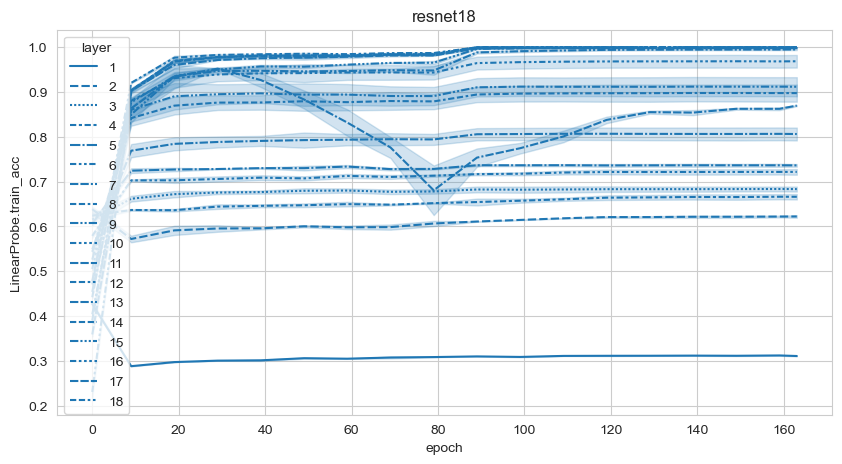

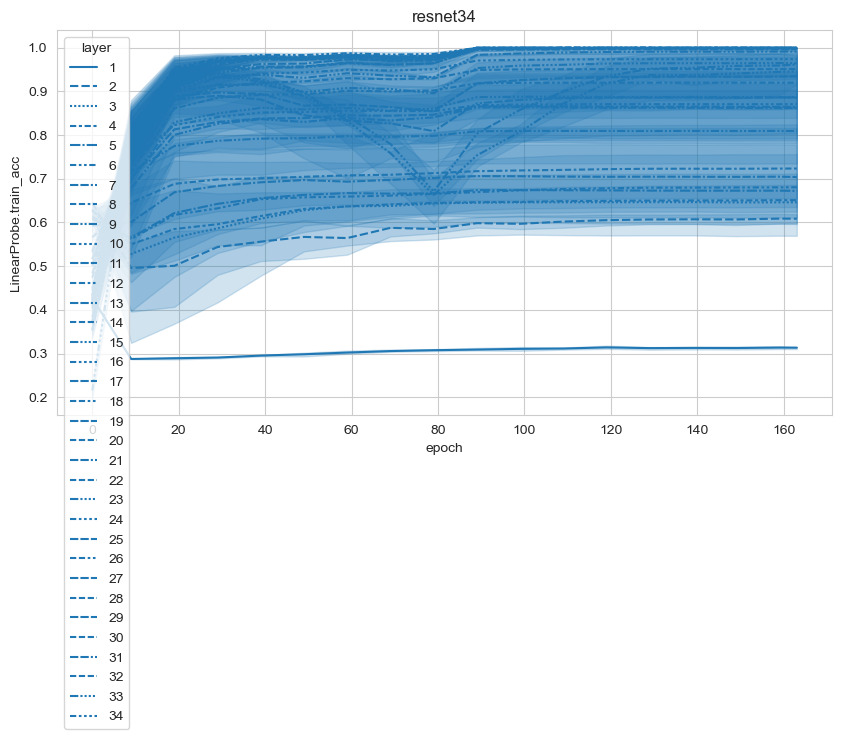

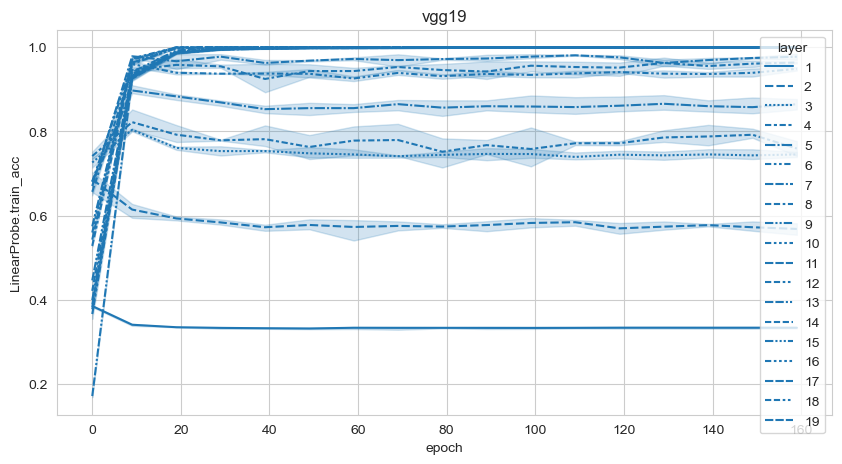

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

for model in ['resnet18', 'resnet34', 'vgg19']:
    df2 = df[(df['model']==model) & (df['dataset']=='cifar10')]
    
    plt.figure(figsize = (10,5))
    plt.title(model)
    sns.lineplot(x="epoch", y="LinearProbe.train_acc", data=df2, style='layer')

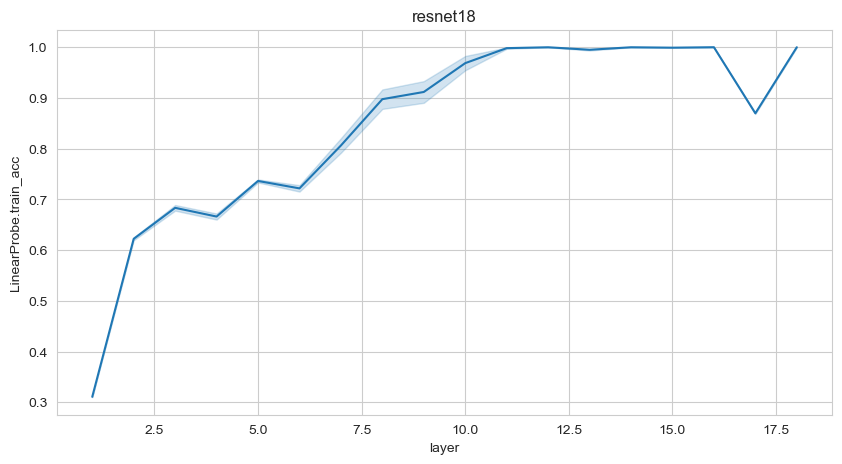

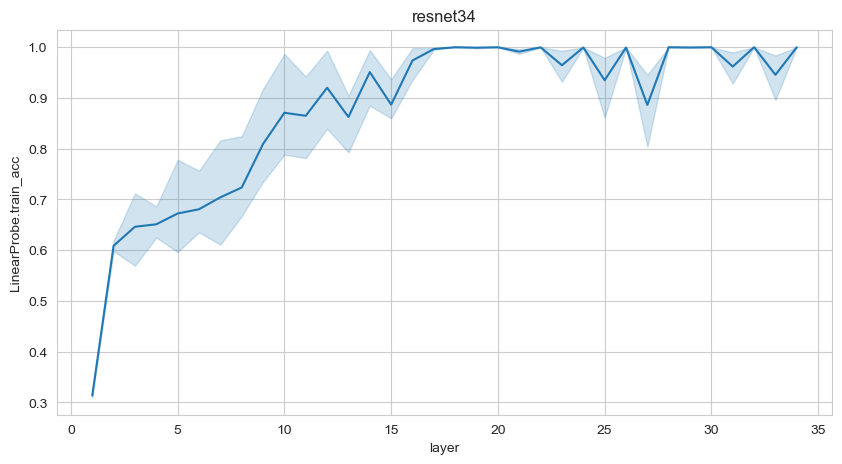

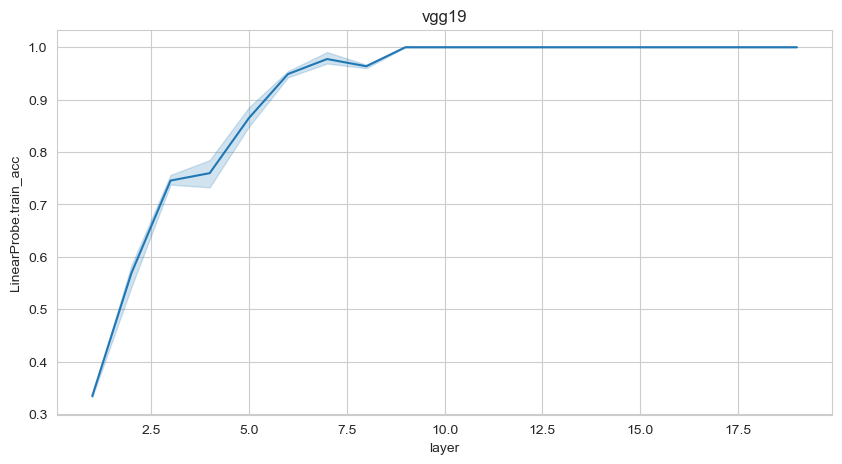

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

for model in ['resnet18', 'resnet34', 'vgg19']:
    df2 = df[(df['model']==model) & (df['dataset']=='cifar10') & df['last']]
    
    plt.figure(figsize = (10,5))
    plt.title(model)
    sns.lineplot(x="layer", y="LinearProbe.train_acc", data=df2)

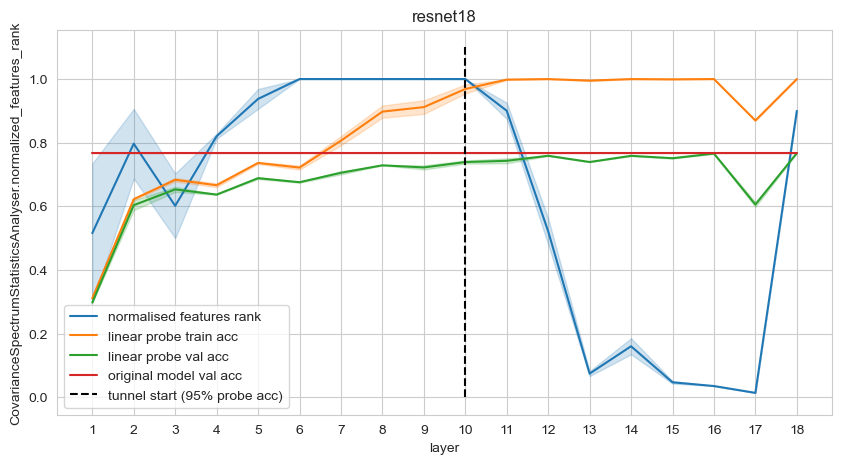

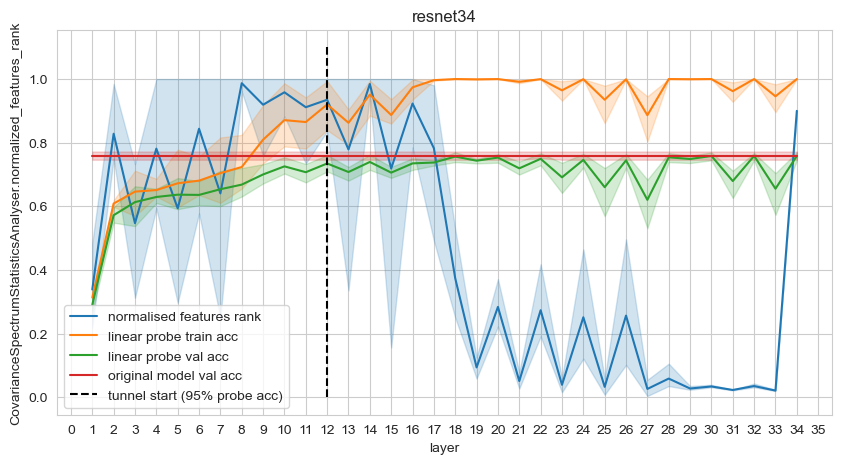

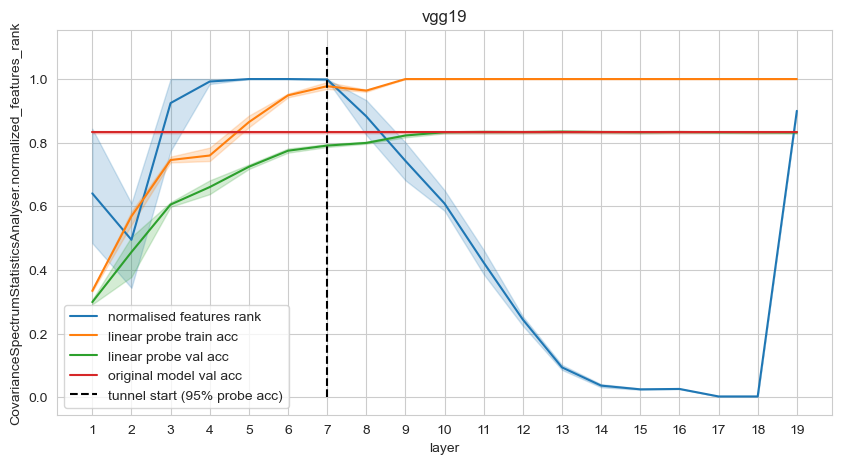

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

for model in ['resnet18', 'resnet34', 'vgg19']:
    df2 = df[(df['model']==model) & (df['dataset']=='cifar10') & (df['last'])]

    tunnel = df2[(df2['LinearProbe.val_acc'] > 0.95 * df2['val_acc'].mean())].iloc[0]['layer']

    plt.figure(figsize = (10,5))
    plt.title(model)
    loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
    plt.gca().xaxis.set_major_locator(loc)
    # sns.lineplot(x="layer", y="CovarianceSpectrumStatisticsAnalyser.features_rank", data=df2)
    sns.lineplot(x="layer", y="CovarianceSpectrumStatisticsAnalyser.normalized_features_rank", data=df2, label="normalised features rank")
    sns.lineplot(x="layer", y="LinearProbe.train_acc", data=df2, label="linear probe train acc")
    sns.lineplot(x="layer", y="LinearProbe.val_acc", data=df2, label="linear probe val acc")
    sns.lineplot(x="layer", y="val_acc", data=df2, label="original model val acc")
    plt.vlines(tunnel, 0, 1.1, linestyles='dashed', colors='k', label='tunnel start (95% probe acc)')
    plt.legend()


In [58]:
df[(df['model']=='resnet18') & (df['dataset']=='cifar10') & (df['last'])]['layer']

0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
9      10
10     11
11     12
12     13
13     14
14     15
15     16
16     17
17     18
570     1
571     2
572     3
573     4
574     5
575     6
576     7
577     8
578     9
579    10
580    11
581    12
582    13
583    14
584    15
585    16
586    17
587    18
Name: layer, dtype: int64